In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar los datos
file_path = "/content/PreprocesadoElizabeta160724_resultados.xlsx"
df = pd.read_excel(file_path)

In [ ]:
import numpy as np

# Función para convertir cadenas de embeddings en arrays de numpy
def convert_embedding(embedding_str):
    # Reemplazar puntos suspensivos y dividir la cadena
    nums = embedding_str.strip('[]').replace('\n', '').replace('...', '').split()
    return np.array([float(num) for num in nums if num]) # Convertir a float solo si no es una cadena vacía

In [ ]:
# Función para asegurar que todos los embeddings tengan la misma longitud
def pad_embeddings(embeddings, target_length):
    padded_embeddings = np.zeros((len(embeddings), target_length))
    for i, embedding in enumerate(embeddings):
        length = min(len(embedding), target_length)
        padded_embeddings[i, :length] = embedding[:length]
    return padded_embeddings

In [ ]:
# Mostrar las características de los datos
print(f"Longitud del DataFrame: {len(df)}")
print("Tipos de datos de cada columna:")
print(df.dtypes)

Longitud del DataFrame: 164
Tipos de datos de cada columna:
Nombre del archivo                       object
ID                                       object
Hechos                                   object
Pretensiones                             object
Consideraciones 1                        object
Consideraciones 2                        object
Consideraciones 3                        object
Consideraciones 4                        object
Sección resuelve                         object
Etiqueta                                  int64
tokens hechos                            object
número de tokens hechos                   int64
tokens pretensiones                      object
número de tokens pretensiones             int64
tokens hechos 1                          object
tokens hechos 2                          object
tokens hechos 3                          object
tokens pretensiones 1                    object
tokens pretensiones 2                    object
tokens pretensiones 3       

In [ ]:
# Seleccionar columnas de embeddings y la etiqueta
embedding_columns = [
    'embeddings_tokens hechos 1', 'embeddings_tokens hechos 2', 'embeddings_tokens hechos 3',
    'embeddings_tokens pretensiones 1', 'embeddings_tokens pretensiones 2', 'embeddings_tokens pretensiones 3'
]

In [ ]:
import numpy as np

# Función para convertir cadenas de embeddings en arrays de numpy
def convert_embedding(embedding_str):
    # Reemplazar puntos suspensivos, saltos de línea y corchetes, y dividir la cadena
    nums = embedding_str.replace('\n', '').replace('...', '').replace('[', '').replace(']', '').split()
    return np.array([float(num) for num in nums if num]) # Convertir a float solo si no es una cadena vacía

In [ ]:
# Convertir las columnas de embeddings
for col in embedding_columns:
    df[col] = df[col].apply(convert_embedding)

In [ ]:
# Determinar la longitud máxima de los embeddings
max_length = max(df[embedding_columns].applymap(len).max())

In [ ]:
# Asegurar que todos los embeddings tengan la misma longitud
for col in embedding_columns:
    df[col] = pad_embeddings(df[col], max_length)

In [ ]:
# Combinar los embeddings en una sola matriz, asegurándose de que las dimensiones sean correctas
X = np.hstack([df[col].values.reshape(-1, 1) for col in embedding_columns])  # Reshape para asegurar que cada embedding sea una columna
y = df['Etiqueta'].values

In [ ]:
# Verificar las dimensiones de X e y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (164, 6)
Shape of y: (164,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

In [ ]:
# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
# Definir hiperparámetros a explorar
param_grid = {
    'n_estimators': [200, 250, 300],
    'max_depth': [2, 4, 8],
    'criterion': ['gini'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
# Import necessary library
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=50)  # Initialize with a random state for reproducibility

In [ ]:
# Realizar Grid Search para encontrar los mejores parámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=50), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [2, 4, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 250, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
# Obtener los mejores parámetros y el mejor modelo
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

In [ ]:
# Entrenar el modelo con los mejores parámetros
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, n_estimators=200,
                       random_state=50)

In [ ]:
# Evaluar el modelo
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

In [ ]:
# Generar reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.65      0.58        17
           1       0.50      0.38      0.43        16

    accuracy                           0.52        33
   macro avg       0.51      0.51      0.50        33
weighted avg       0.51      0.52      0.51        33



aquí vamos

In [ ]:
# Obtener los mejores parámetros y el mejor modelo
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

In [ ]:
# Entrenar el modelo con los mejores parámetros
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [ ]:
# Evaluar el modelo
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

In [ ]:
# Generar reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.73      0.66        26
           1       0.61      0.46      0.52        24

    accuracy                           0.60        50
   macro avg       0.60      0.59      0.59        50
weighted avg       0.60      0.60      0.59        50



Segundo intento

In [ ]:
# Contar los datos por etiqueta
print("\nConteo de datos por etiqueta:")
print(df['Etiqueta'].value_counts())


Conteo de datos por etiqueta:
Etiqueta
0    85
1    79
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Contar los datos por etiqueta
print("\nConteo de datos por etiqueta:")
print(df['Etiqueta'].value_counts())


Conteo de datos por etiqueta:
Etiqueta
0    85
1    79
Name: count, dtype: int64


In [ ]:
# Definir el número de folds para la validación cruzada
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterar sobre los folds y entrenar/evaluar el modelo
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


In [ ]:
# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [ ]:
# Definir el modelo Random Forest y los parámetros para Grid Search
rf = RandomForestClassifier(random_state=42, bootstrap=True)
param_grid = {
    'n_estimators': [50, 200, 300],
    'max_depth': [8, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
# Realizar Grid Search para encontrar los mejores parámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 

In [ ]:
# Obtener los mejores parámetros y el mejor modelo
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

In [ ]:
# Entrenar el modelo con los mejores parámetros
best_rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=20, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=300, random_state=42)

In [ ]:
# Evaluar el modelo
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

In [ ]:
# Generar reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        20
           1       0.67      0.62      0.64        13

    accuracy                           0.73        33
   macro avg       0.71      0.71      0.71        33
weighted avg       0.72      0.73      0.73        33



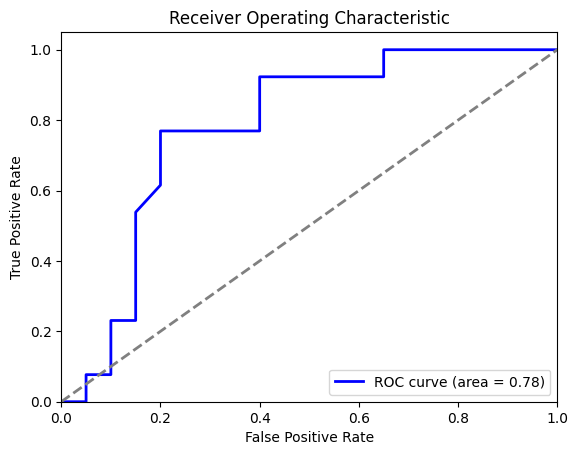

In [ ]:
# Calcular y graficar la curva ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

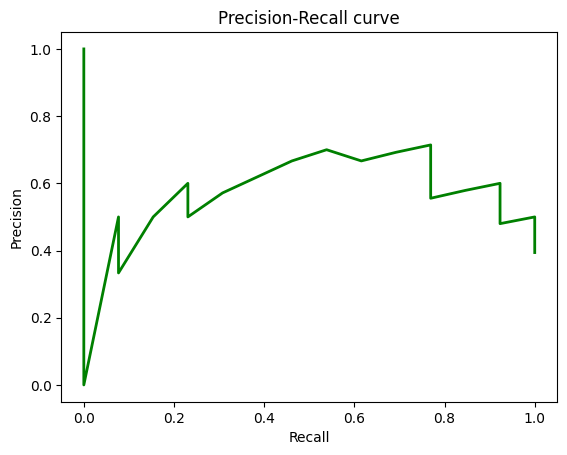

In [ ]:
# Calcular y graficar la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
# Calcular y graficar otras métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    'Metric': ['ROC AUC', 'Accuracy', 'F1 Score'],
    'Score': [roc_auc, accuracy, f1]
})

<ipython-input-56-92ba7cc179a8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='Blues_d')


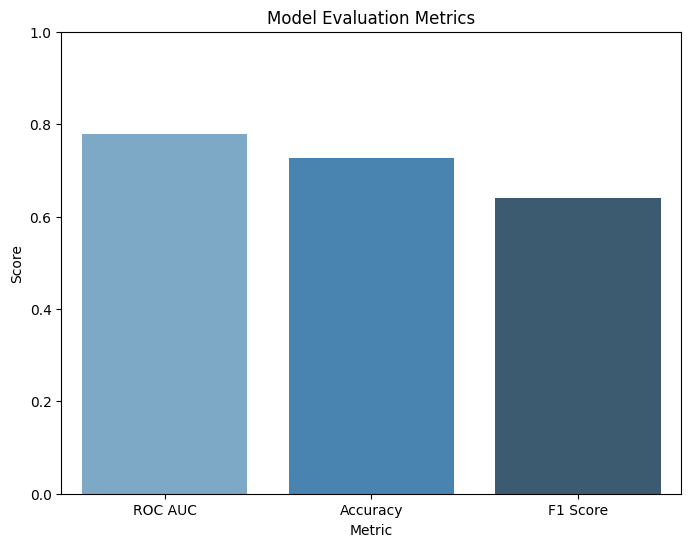

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='Blues_d')
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

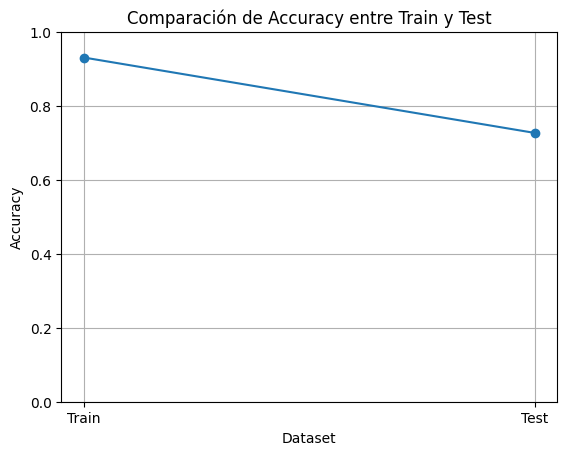

In [ ]:
import matplotlib.pyplot as plt

# Calcular accuracy para train y test (esto ya lo has hecho en tu código)
train_accuracy = accuracy_score(y_train, best_rf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

# Crear el gráfico de líneas
plt.plot(['Train', 'Test'], [train_accuracy, test_accuracy], marker='o')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy entre Train y Test')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

opcíon tres con balanceo

In [ ]:
# Predict on the training set
y_train_pred = best_rf.predict(X_train)
y_train_pred_proba = best_rf.predict_proba(X_train)[:, 1]

# Calculate metrics for the training set
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
accuracy_train = accuracy_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

In [ ]:
metrics_df = pd.DataFrame({
    'Metric': ['ROC AUC', 'Accuracy', 'F1 Score'] * 2,
    'Score': [roc_auc_train, accuracy_train, f1_train, roc_auc, accuracy, f1],
    'Set': ['Train', 'Train', 'Train', 'Test', 'Test', 'Test']
})

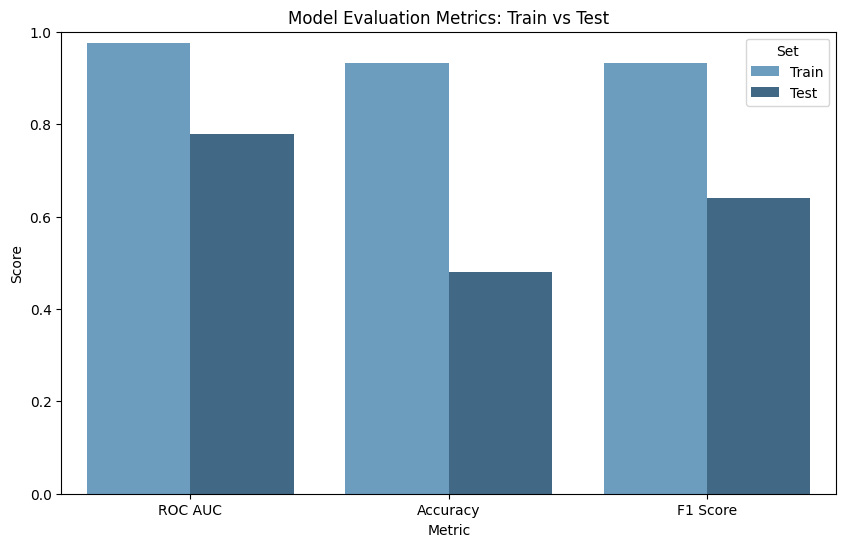

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Set', data=metrics_df, palette='Blues_d')
plt.title('Model Evaluation Metrics: Train vs Test')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

Nuevo intento, por favor funciona

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

intento con gemini

In [ ]:
from IPython import get_ipython
from IPython.display import display

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [ ]:
# Assuming 'X' is your feature data with 984 samples and needs to be reduced to 164
X = X[:164]

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [ ]:
# Balanceo de datos con SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Definir el modelo Random Forest y los parámetros para Grid Search
rf = RandomForestClassifier(random_state=42, bootstrap=True)
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

In [ ]:
# Realizar Grid Search con validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'max_depth': [None, 5, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
# Obtener los mejores parámetros y el mejor modelo
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

In [ ]:
# Entrenar el modelo con los mejores parámetros
best_rf.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(class_weight='balanced', max_depth=5,
                       max_features='auto', min_samples_split=20,
                       n_estimators=300, random_state=42)

In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

In [ ]:
# Generar reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.35      0.44        20
           1       0.38      0.62      0.47        13

    accuracy                           0.45        33
   macro avg       0.48      0.48      0.45        33
weighted avg       0.50      0.45      0.45        33

